# HW2

<img src="https://raw.githubusercontent.com/tensorflow/tpu/master/models/official/efficientnet/g3doc/params.png" width=600 height=300 />

График точности моделей на датасете ImageNet


## Задание 1 (базовое)

Построить аналогичный график accuracy top 5 для различных моделей из Keras (можно на свой выбор) на примере датасета [imagenette](https://github.com/fastai/imagenette). Можете в целом использовать любой из тех, что есть в репозитории, но не забудьте указать какой. Валидация на части `valid` из датасета. 


Более подробные графики с самыми последними результатами можно найти тут: [paperwithcode](https://paperswithcode.com/sota/image-classification-on-imagenet).

В том числе можно попытаться воспользоваться реализацией [FixEfficientNetV2](https://github.com/facebookresearch/FixRes), про которую мы на лекции не говорили, но она есть.

---

Еще ответы на вопросы (которые могут возникнуть):
- Q: Можно я напишу на Tensorflow/PyTorch чистом как моя душа желает?
- A: Да, можно, если я увижу в конце график и подробное описание что на нём.

...

- Q: Обязательно ли делать не базовую часть домашки?
- A: Не обязательно.

...

- Q: У меня проблема с реализацией, что делать?
- A: Пишите в слак в группу.

...


- Q: Можно ли вставлять в домашку смешные картиночки?
- A: Смешные картиночки это очень хорошо.

In [1]:
import numpy as np

from pathlib import Path

In [2]:
from tensorflow.keras.applications import vgg16, inception_v3, resnet50, mobilenet, efficientnet
from tensorflow.keras.applications import imagenet_utils
from torchvision.datasets.utils import download_url

Если же вам угодно протестировать альтернативные модели, не стесняйтесь

In [3]:
# Набор вспомогательных методов

def get_model(model_name):
    if model_name == 'vgg16':
        model = vgg16.VGG16(weights='imagenet')
    elif model_name == 'inception_v3':
        model = inception_v3.InceptionV3(weights='imagenet')
    elif model_name == 'resnet50':
        model = resnet50.ResNet50(weights='imagenet')
    elif model_name == 'mobilenet':
        model = mobilenet.MobileNet(weights='imagenet')
    elif model_name == 'efficientnet':
        model = efficientnet.EfficientNetB6(weights='imagenet')
    return model

def get_helper_module(model_name):
    if model_name == 'vgg16':
        return vgg16
    elif model_name == 'inception_v3':
        return inception_v3
    elif model_name == 'resnet50':
        return resnet50
    elif model_name == 'mobilenet':
        return mobilenet
    elif model_name == 'efficientnet':
        return efficientnet

In [4]:
MODEL_NAME = 'efficientnet'

model = get_model(MODEL_NAME)
helper_module = get_helper_module(MODEL_NAME)

## Быстрый тест

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
dataset_url = 'https://s3.amazonaws.com/fast-ai-imageclas/imagenette-160.tgz'
db = download_url(dataset_url,'.')

Using downloaded and verified file: ./imagenette-160.tgz


In [7]:
import tarfile
import os

In [8]:
# Extract from archive
with tarfile.open('./imagenette-160.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')
    
# Look into the data directory
data_dir = './data/imagenette-160'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['train', 'val']
['n02102040', 'n03394916', 'n03425413', 'n03888257', 'n02979186', 'n03000684', 'n03417042', 'n03028079', 'n03445777', 'n01440764']


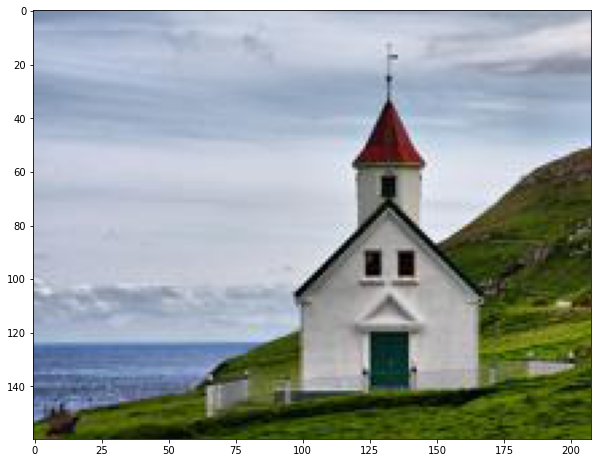

In [9]:
# test image
image = Image.open(data_dir + '/val/n03028079/ILSVRC2012_val_00004912.JPEG')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [10]:
# preprocess input
x = image.resize((model.input_shape[1], model.input_shape[1]))
x = helper_module.preprocess_input(x)
x = np.expand_dims(x, 0)

# make prediction and decode
y = model.predict(x)
helper_module.decode_predictions(y)

[[('n03028079', 'church', 0.38578045),
  ('n02814860', 'beacon', 0.08589471),
  ('n02825657', 'bell_cote', 0.06820371),
  ('n03781244', 'monastery', 0.049446695),
  ('n09332890', 'lakeside', 0.02182017)]]

## Подгружаем датасет

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
valid_datagen = ImageDataGenerator(preprocessing_function=helper_module.preprocess_input)

valid_gen = valid_datagen.flow_from_directory(
    data_dir + "/val",
    shuffle=False, seed=42, 
    target_size=model.input_shape[1:-1],
    batch_size=32
)

Found 500 images belonging to 10 classes.


In [13]:
class_dict=valid_gen.class_indices
labels = {}
for k, v in class_dict.items():
    labels[v] = k
print(labels)

{0: 'n01440764', 1: 'n02102040', 2: 'n02979186', 3: 'n03000684', 4: 'n03028079', 5: 'n03394916', 6: 'n03417042', 7: 'n03425413', 8: 'n03445777', 9: 'n03888257'}


In [16]:
# 0.5 балла
y_true = []

for lbl in valid_gen.classes: 
    y_true.append(labels[lbl])

In [17]:
np.shape(y_true)

(500,)

In [18]:
y_true

['n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n01440764',
 'n02102040',
 'n02102040',
 'n02102040',
 'n02102040',
 'n02102040',
 'n02102040',
 'n02102040',
 'n02102040',
 'n02102040',
 'n02102040',
 'n02102040',
 'n02102040',
 'n02102040',
 'n02102040',
 'n02102040',
 'n02102040',
 'n02102040',
 'n02102040',
 'n02102040',
 'n02102040',
 'n02102040',
 'n021

In [19]:
preds = model.predict(valid_gen, verbose=1)
preds_decoded = helper_module.decode_predictions(preds, top=5)

16/16 [==============================] - 33s 2s/step


In [20]:
len(preds_decoded)

500

In [21]:
preds_decoded[0]

[('n01440764', 'tench', 0.74109054),
 ('n02526121', 'eel', 0.07635033),
 ('n02640242', 'sturgeon', 0.036818743),
 ('n02514041', 'barracouta', 0.02968004),
 ('n02536864', 'coho', 0.016877012)]

In [22]:
get_codes = lambda item: [i[0] for i in item]
y_pred = [get_codes(item) for item in preds_decoded]
print(len(y_pred))
print(y_pred[0])

500
['n01440764', 'n02526121', 'n02640242', 'n02514041', 'n02536864']


## Top k accuracy (2 балла)

In [23]:
def top_k_accuracy(y_pred, y_true, k=5):
    right_ans = []
    for ind in range(len(y_true)):
        if y_true[ind] in y_pred[ind][:k]:
            right_ans.append(1)
        else:
            right_ans.append(0)    
    return np.mean(right_ans)

In [24]:
top5_accuracy = top_k_accuracy(y_pred, y_true, k=5)
print(top5_accuracy)

0.926


In [25]:
top1_accuracy = top_k_accuracy(y_pred, y_true, k=1)
print(top1_accuracy)

0.728


In [26]:
model.count_params()

43265143

## Ваше решение  

Нужно построить график точности моделей от числа ее параметров, подписать где какая модель (1.5 балла)

In [29]:
def get_top_k_par_cnt_for_model(model_name, k_arr):
    model = get_model(model_name)
    helper_module = get_helper_module(model_name)
    
    valid_datagen = ImageDataGenerator(preprocessing_function=helper_module.preprocess_input)
    valid_gen = valid_datagen.flow_from_directory(
        data_dir + "/val",
        shuffle=False, seed=42, 
        target_size=model.input_shape[1:-1],
        batch_size=32
    )
    preds = model.predict(valid_gen, verbose=1)
    preds_decoded = helper_module.decode_predictions(preds, top=5)
    y_pred = [get_codes(item) for item in preds_decoded]
    print("y_pred shape: ", np.shape(y_pred))
    # 0.5 балла
    y_true = []
    for lbl in valid_gen.classes: 
        y_true.append(labels[lbl])
    
    print("y_true shape: ", np.shape(y_true))
    print("y_true = ", y_true[:5])
    print("y_pred = ", y_pred[:5])
    result = []
    for k in k_arr:
        print("k = ", k)
        result.append(top_k_accuracy(y_pred, y_true, k))
    return result, model.count_params()


In [30]:
MODEL_NAMES = ['vgg16', 'inception_v3', 'resnet50', 'mobilenet','efficientnet']
model_top_1_dict = {}
model_top_5_dict = {}
k_arr = [1, 5]
model_x = []
model_y = []
for name in MODEL_NAMES:
    res, par_cnt = get_top_k_par_cnt_for_model(name, k_arr)
    model_top_1_dict[name] = res[0]
    model_top_5_dict[name] = res[1]
    model_x.append(par_cnt)
    model_y.append(res[0])

Found 500 images belonging to 10 classes.
16/16 [==============================] - 3s 164ms/step
y_pred shape:  (500, 5)
y_true shape:  (500,)
y_true =  ['n01440764', 'n01440764', 'n01440764', 'n01440764', 'n01440764']
y_pred =  [['n01677366', 'n01695060', 'n01694178', 'n01737021', 'n01698640'], ['n01440764', 'n02174001', 'n01873310', 'n02536864', 'n02641379'], ['n02536864', 'n02408429', 'n01440764', 'n02093256', 'n02106550'], ['n01440764', 'n02514041', 'n03259280', 'n01664065', 'n02640242'], ['n01440764', 'n03788365', 'n02909870', 'n03134739', 'n02797295']]
k =  1
k =  5
96124928/96112376 [==============================] - 0s 0us/step
Found 500 images belonging to 10 classes.
16/16 [==============================] - 7s 225ms/step
y_pred shape:  (500, 5)
y_true shape:  (500,)
y_true =  ['n01440764', 'n01440764', 'n01440764', 'n01440764', 'n01440764']
y_pred =  [['n01440764', 'n02526121', 'n02640242', 'n01667778', 'n01496331'], ['n01440764', 'n02536864', 'n02514041', 'n04067472', 'n0320

In [32]:
model_top_1_dict

{'efficientnet': 0.728,
 'inception_v3': 0.73,
 'mobilenet': 0.644,
 'resnet50': 0.67,
 'vgg16': 0.684}

In [33]:
model_top_5_dict

{'efficientnet': 0.926,
 'inception_v3': 0.898,
 'mobilenet': 0.876,
 'resnet50': 0.884,
 'vgg16': 0.894}

In [34]:
x_values = np.array(model_x)/1000000
y_values = np.array(list(model_top_5_dict.values()))*100

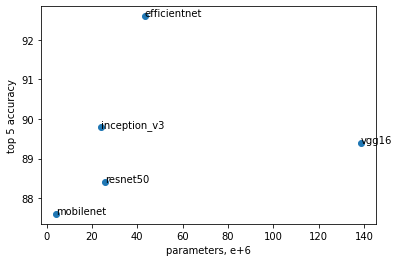

In [37]:
plt.scatter(x_values, y_values)
i = 0
for key in model_top_5_dict.keys():
    plt.xlabel("parameters, e+6")
    plt.ylabel("top 5 accuracy")
    plt.annotate(key, (x_values[i], y_values[i]))
    i += 1

| Model Name | Top 1 accuracy | Top 5 accuracy|
|------------|:---------------|:--------------|
|efficientnet| 0.728|0.926|  
|inception_v3| 0.73| 0.898|
|mobilenet|0.644|0.876|
|resnet50| 0.67|0.884|
|vgg16'|0.684|0.894|